## Training Data

### Importing the training data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\hp world\Downloads\7c9cd64e078411e9\dataset\hm_train.csv')
df.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category
0,27673,24h,I went on a successful date with someone I fel...,1,affection
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise
3,27676,24h,We had a serious talk with some friends of our...,2,bonding
4,27677,24h,I went with grandchildren to butterfly display...,1,affection


In [4]:
df.shape

(60321, 5)

### Checking for missing values

In [8]:
df.isnull().sum()

hmid                  0
reflection_period     0
cleaned_hm            0
num_sentence          0
predicted_category    0
dtype: int64

### Selecting the relevant features for model training

In [4]:
df1 = df[['predicted_category', 'cleaned_hm']]
df1.head()

,predicted_category,cleaned_hm
0,affection,I went on a successful date with someone I fel...
1,affection,I was happy when my son got 90% marks in his e...
2,exercise,I went to the gym this morning and did yoga.
3,bonding,We had a serious talk with some friends of our...
4,affection,I went with grandchildren to butterfly display...


### Checking the skewness of the target variable

In [5]:
df1['predicted_category'].value_counts()

affection           20880
achievement         20274
bonding              6561
enjoy_the_moment     6508
leisure              4242
nature               1127
exercise              729
Name: predicted_category, dtype: int64

In [6]:
import matplotlib.pyplot as plt

<Figure size 720x432 with 0 Axes>

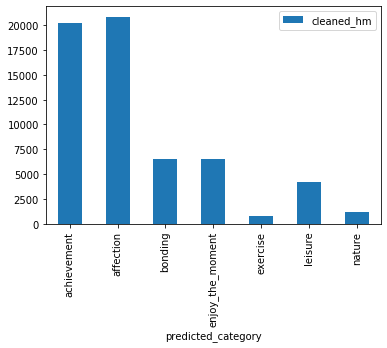

In [7]:
fig = plt.figure(figsize=(10,6))
df1.groupby('predicted_category').count().plot.bar(ylim=0)
plt.show()

### Splitting the dataset for training and testing

In [9]:
prediction = df1['predicted_category']
statement = df1['cleaned_hm']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(statement, prediction, random_state = 0, test_size = 0.3)

### Converting text into numbers to feed to the Machine Learning Algorithm

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
count = CountVectorizer()
tfidf = TfidfTransformer()

In [14]:
X_train_count = count.fit_transform(X_train)
X_train_transformed = tfidf.fit_transform(X_train_count)

In [15]:
X_test_count = count.transform(X_test)
X_test_transformed = tfidf.transform(X_test_count)

### Encoding the different classes of the target variable into numbers

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
labels = LabelEncoder()

In [18]:
y_train_labels_ft = labels.fit_transform(y_train)
y_test_labels_ft = labels.transform(y_test)

### Implementing the suitable classification algorithm

In [19]:
from sklearn.svm import LinearSVC

In [20]:
linear_svc = LinearSVC()
clf = linear_svc.fit(X_train_transformed,y_train_labels_ft)

### Predicting on the test set

In [21]:
predicted_clf = clf.predict(X_test_transformed)

### Checking accurracy of the predictions on the training data

In [22]:
from sklearn.metrics import f1_score

In [23]:
f1_score(predicted_clf,y_test_labels_ft, average = 'weighted')

0.9294317830683883

In [24]:
label_prediction = labels.inverse_transform(predicted_clf)

In [25]:
df2 = pd.DataFrame()
df2['cleaned_hm'] = X_test
df2['predicted_category'] = label_prediction
df2.head()

,cleaned_hm,predicted_category
51773,My insurance company waived my deductible for ...,achievement
51982,I WENT TO TEMPLE,leisure
52000,I WENT TO MOVIE,leisure
40554,I've lost a lot of weight and I've gotten used...,achievement
16319,I managed to send some money to my mother. I h...,achievement


In [26]:
df2['predicted_category'].value_counts()

affection           6300
achievement         6245
bonding             1972
enjoy_the_moment    1789
leisure             1239
nature               337
exercise             215
Name: predicted_category, dtype: int64

## Testing Data

### Importing the testing  data

In [27]:
df_test = pd.read_csv(r'C:\Users\hp world\Downloads\7c9cd64e078411e9\dataset\hm_test.csv')
df_test.head()

,hmid,reflection_period,cleaned_hm,num_sentence
0,88305,3m,I spent the weekend in Chicago with my friends.,1
1,88306,3m,We moved back into our house after a remodel. ...,2
2,88307,3m,My fiance proposed to me in front of my family...,1
3,88308,3m,I ate lobster at a fancy restaurant with some ...,1
4,88309,3m,I went out to a nice restaurant on a date with...,5


### Checking for missing values

In [28]:
df_test.isnull().sum()

hmid                 0
reflection_period    0
cleaned_hm           0
num_sentence         0
dtype: int64

### Prediction on the testing dataset(unknown data) provided

In [29]:
test_data = df_test['cleaned_hm']

In [30]:
test_data_count = count.transform(test_data)
test_data_transformed = tfidf.transform(test_data_count)

In [32]:
test_prediction = clf.predict(test_data_transformed)
test_prediction

array([2, 0, 1, ..., 1, 2, 4])

In [33]:
test_label_prediction = labels.inverse_transform(test_prediction)
test_label_prediction

array(['bonding', 'achievement', 'affection', ..., 'affection', 'bonding',
       'exercise'], dtype=object)

### Creating a dataframe according to the submmission criteria

In [34]:
test_df1 = pd.DataFrame()
test_df1['hmid'] = df_test['hmid']
test_df1['predicted_category'] = test_label_prediction
test_df1.head()

,hmid,predicted_category
0,88305,bonding
1,88306,achievement
2,88307,affection
3,88308,bonding
4,88309,affection


### Visualizing the predictions

<Figure size 720x432 with 0 Axes>

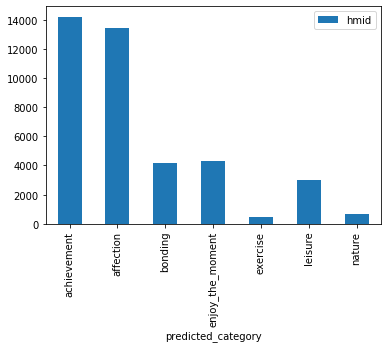

In [35]:
fig = plt.figure(figsize=(10,6))
test_df1.groupby('predicted_category').count().plot.bar(ylim=0)
plt.show()

In [36]:
test_df1['predicted_category'].value_counts()

achievement         14223
affection           13419
enjoy_the_moment     4312
bonding              4149
leisure              2982
nature                676
exercise              452
Name: predicted_category, dtype: int64

### Importing the results as a csv file

In [37]:
test_df1.to_csv('test_df_final.csv', header=True, index=False)